In [143]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import math
import cv2
import random
import copy
import seaborn as sns

# see train
train = pd.read_csv('./data/training.csv')
test = pd.read_csv('./data/test.csv')
id_lookup_data = ('/data/IdLookupTable.csv')


print(train.shape, test.shape)
# print(test.head())
# print(train.head())

(7049, 31) (1783, 2)


<Axes: >

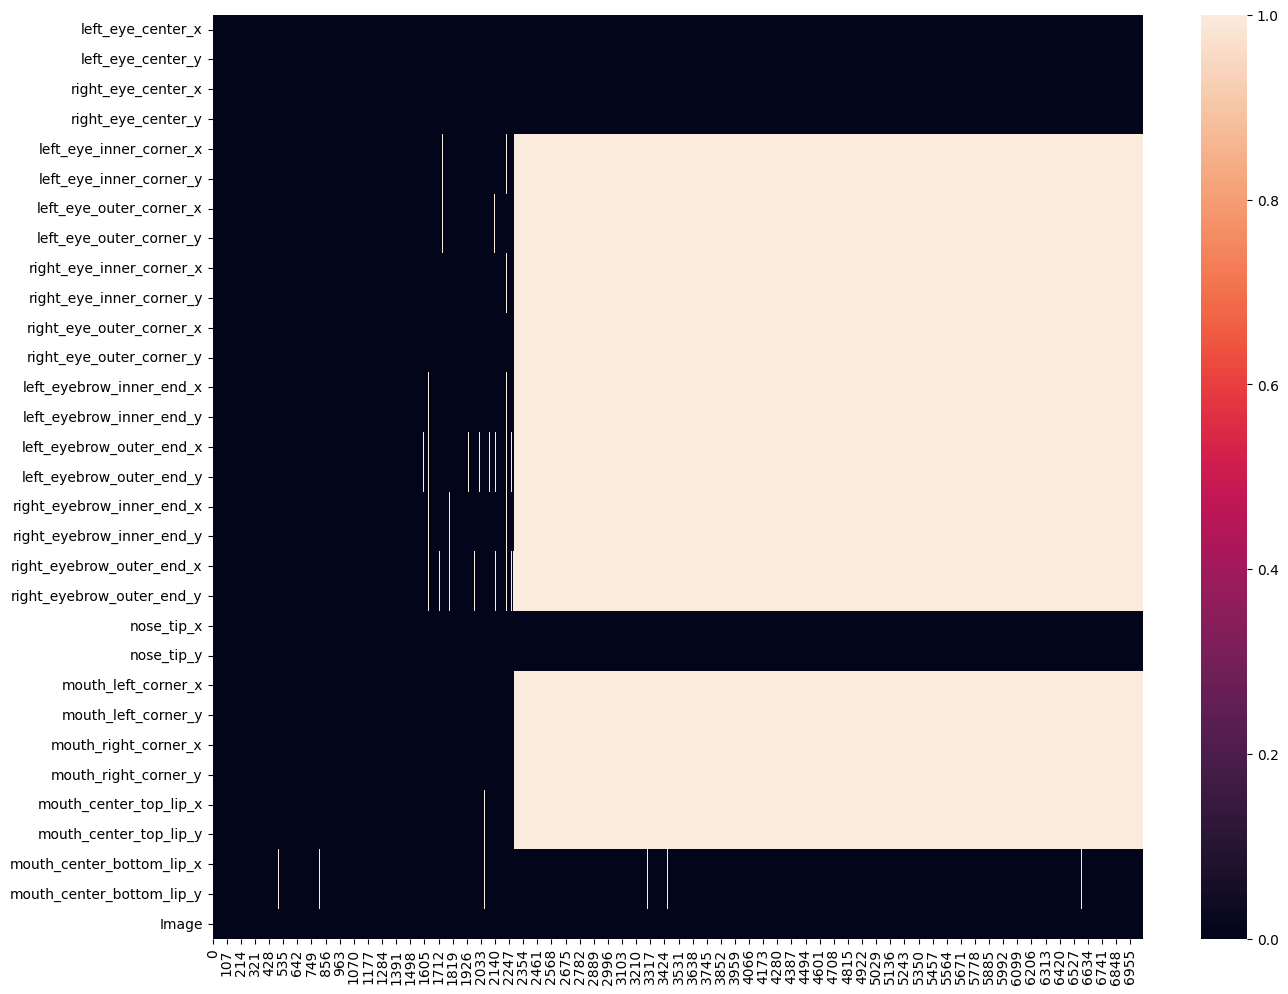

In [144]:
plt.subplots(figsize=(15,12))
sns.heatmap(train.isna().T)

# Visualize Data

In [145]:
print(type(train))

<class 'pandas.core.frame.DataFrame'>


In [146]:
from PIL import Image
import numpy as np
import matplotlib.pyplot as plt

train.isnull().sum()

left_eye_center_x              10
left_eye_center_y              10
right_eye_center_x             13
right_eye_center_y             13
left_eye_inner_corner_x      4778
left_eye_inner_corner_y      4778
left_eye_outer_corner_x      4782
left_eye_outer_corner_y      4782
right_eye_inner_corner_x     4781
right_eye_inner_corner_y     4781
right_eye_outer_corner_x     4781
right_eye_outer_corner_y     4781
left_eyebrow_inner_end_x     4779
left_eyebrow_inner_end_y     4779
left_eyebrow_outer_end_x     4824
left_eyebrow_outer_end_y     4824
right_eyebrow_inner_end_x    4779
right_eyebrow_inner_end_y    4779
right_eyebrow_outer_end_x    4813
right_eyebrow_outer_end_y    4813
nose_tip_x                      0
nose_tip_y                      0
mouth_left_corner_x          4780
mouth_left_corner_y          4780
mouth_right_corner_x         4779
mouth_right_corner_y         4779
mouth_center_top_lip_x       4774
mouth_center_top_lip_y       4774
mouth_center_bottom_lip_x      33
mouth_center_b

In [147]:
train.fillna(method = 'ffill',inplace = True)
train.isnull().sum()

left_eye_center_x            0
left_eye_center_y            0
right_eye_center_x           0
right_eye_center_y           0
left_eye_inner_corner_x      0
left_eye_inner_corner_y      0
left_eye_outer_corner_x      0
left_eye_outer_corner_y      0
right_eye_inner_corner_x     0
right_eye_inner_corner_y     0
right_eye_outer_corner_x     0
right_eye_outer_corner_y     0
left_eyebrow_inner_end_x     0
left_eyebrow_inner_end_y     0
left_eyebrow_outer_end_x     0
left_eyebrow_outer_end_y     0
right_eyebrow_inner_end_x    0
right_eyebrow_inner_end_y    0
right_eyebrow_outer_end_x    0
right_eyebrow_outer_end_y    0
nose_tip_x                   0
nose_tip_y                   0
mouth_left_corner_x          0
mouth_left_corner_y          0
mouth_right_corner_x         0
mouth_right_corner_y         0
mouth_center_top_lip_x       0
mouth_center_top_lip_y       0
mouth_center_bottom_lip_x    0
mouth_center_bottom_lip_y    0
Image                        0
dtype: int64

In [148]:
test['Image'][0]

'182 183 182 182 180 180 176 169 156 137 124 103 79 62 54 56 58 48 49 45 39 37 42 43 52 61 78 93 104 107 114 115 117 122 120 122 118 114 115 118 117 123 122 122 112 113 118 125 124 122 109 101 96 102 108 107 100 89 76 67 58 48 44 36 32 21 12 5 15 21 24 33 32 41 52 63 71 90 106 121 152 173 180 183 182 182 183 182 182 181 182 182 183 182 182 182 182 181 181 181 182 179 177 162 136 106 84 64 49 44 40 50 50 42 36 33 32 43 51 67 77 94 106 121 124 128 127 126 128 128 129 126 126 122 128 123 128 123 129 127 133 123 128 129 135 127 122 111 115 118 120 121 118 114 107 107 99 89 74 70 59 47 29 18 16 22 25 25 34 39 45 51 52 60 84 97 124 157 175 181 183 182 183 182 184 181 183 183 183 182 182 182 182 181 180 183 182 180 176 152 111 77 59 45 36 40 51 48 37 29 29 33 45 61 81 95 107 113 120 126 129 128 132 132 130 132 132 132 131 133 130 132 129 130 133 137 136 137 135 137 137 134 129 125 126 131 131 128 128 124 124 122 121 111 105 98 86 72 62 42 27 20 19 14 15 27 40 36 27 41 56 77 107 138 163 176 18

Arrange each image in [96,96] form and scale it by 255.0

(96, 96)


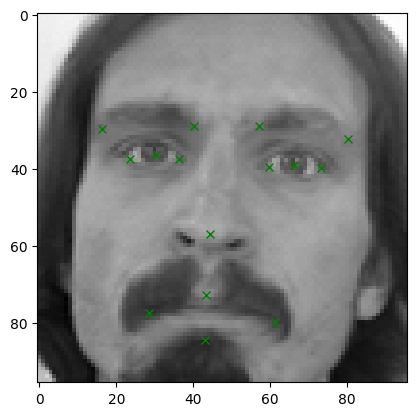

In [149]:
def get_image_and_keypoints(row):
    image = row['Image']
    image = np.fromstring(image, sep=' ').reshape([96, 96])
    image = image / 255.0

    keypoints = pd.DataFrame(row).drop(['Image'], axis=0).values.reshape([15, 2])
    return image, keypoints


def get_image_and_keypoints_by_id(data, id):
    row = data.iloc[id]
    return get_image_and_keypoints(row)


def show_image_with_keypoints(series):
    image, keypoints = get_image_and_keypoints(series)
    print(image.shape)

    for coord in keypoints:
      plt.plot(coord[0], coord[1], 'gx')

    plt.imshow(image, cmap='gray')


def show_image_with_keypoints_by_id(train_data, id):
    image = train_data.iloc[id]
    show_image_with_keypoints(image)

show_image_with_keypoints_by_id(train, 0)

In [150]:
# get rid of duplicated images

# are there any duplicates
def check_for_duplicates():
  duplicates = train.duplicated('Image', keep = 'last')
  print(f'Number of duplicates: {sum(duplicates)}')
  print(duplicates)

check_for_duplicates()

Number of duplicates: 555
0       False
1       False
2       False
3       False
4       False
        ...  
7044    False
7045    False
7046    False
7047    False
7048    False
Length: 7049, dtype: bool


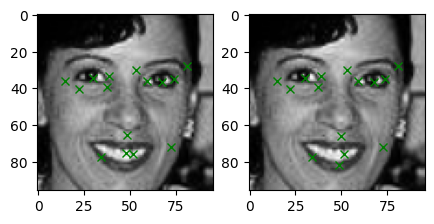

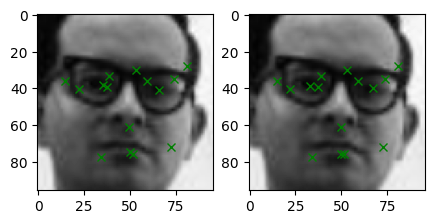

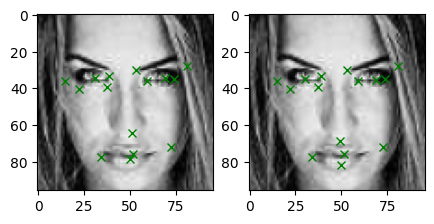

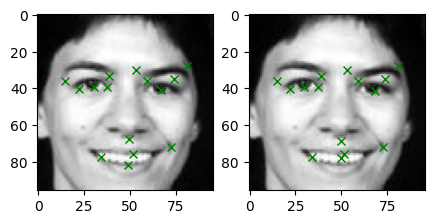

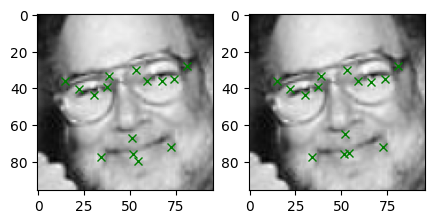

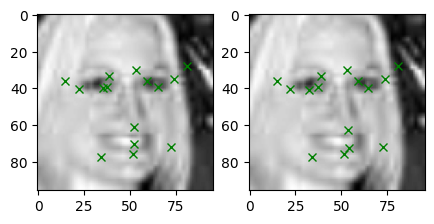

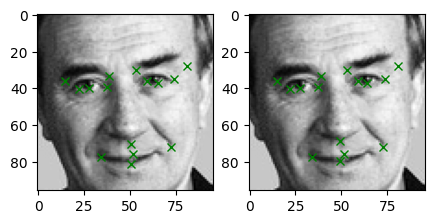

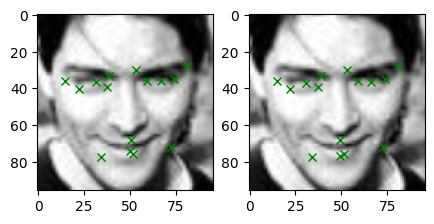

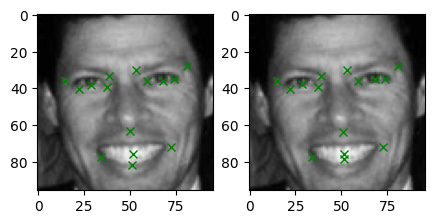

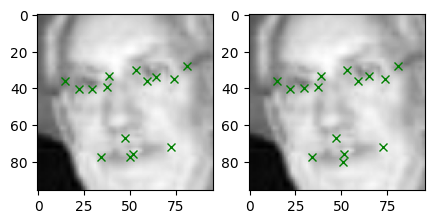

In [151]:
duplicates_list = [g for _, g in train.groupby("Image") if len(g) > 1]
duplicates_df = pd.concat(duplicates_list)



pics_num = 10
for duplicate_df in duplicates_list[:pics_num]:
    n_rows = len(duplicate_df)
    fig = plt.figure(figsize=(5, 5*n_rows))
#     print(n_rows)
    i = 1
    for index, row in duplicate_df.iterrows():
        image, keypoints = get_image_and_keypoints(row)
        fig.add_subplot(1, n_rows, i)
        plt.imshow(image, cmap='gray')
        plt.plot(keypoints[:,0], keypoints[:,1], 'gx')
        i += 1
    plt.show()

In [152]:
 for duplicate_df in duplicates_list:
        n_rows = len(duplicate_df)
        keypoints_list = []
        image = None
        indexes = []
        for index, row in duplicate_df.iterrows():
            image = row['Image']
            indexes.append(index)
            keypoints_df = pd.DataFrame(row).drop(['Image'], axis=0).values
            keypoints_list.append(keypoints_df)

        keypoints_list = np.array(keypoints_list)
        keypoints_list = keypoints_list.reshape((n_rows, 30,))
        # New keypoint as average of all duplicates
        new_keypoints = np.nanmean(keypoints_list, dtype=np.float64, axis=0)
        index_lowest_lip = np.argmax(keypoints_list, axis=0)[-1]
        # Bottom lip from the lowest point in duplicates
        new_keypoints[-1] = keypoints_list[index_lowest_lip, -1]
        new_keypoints[-2] = keypoints_list[index_lowest_lip, -2]
        # Concat keypoints with image
        new_row = new_keypoints.tolist()
        new_row.append(image)

        # Delete all duplicates
        train.drop(index=indexes, inplace=True)
        # Add new row
        train.loc[max(train.index) + 1] = new_row


In [153]:
check_for_duplicates()

Number of duplicates: 0
0       False
1       False
2       False
3       False
4       False
        ...  
7587    False
7588    False
7589    False
7590    False
7591    False
Length: 6494, dtype: bool


## What I learned to do when there are Null datapoints:


1.   alter loss function so when the expected value is NaN the loss is by default 0
2.   use fillna method in pandas for the missing points

3. split dataset and pre learn on model or make two models an then stack them (do more research about the meaning of this)







In [229]:
import torch


def NaNMSELoss(prediction, expected):
  filter = ~torch.isnan(expected)
  return ((prediction[filter] - expected[filter]) ** 2).mean()


# example usage
dummpy_t = torch.tensor([1.2, 2.5, float('nan'), 4.1, float('nan')])
dummpy_e = torch.tensor([1.0, 2.3, 3.0, 4.0, 5.0])
print(NaNMSELoss(dummpy_e, dummpy_t).item())

0.030000006780028343


# Dataset Class

In [155]:
class Dataset() :
  def __init__(self, dataframe, transform = None):
    self.dataframe = dataframe
    self.transform = transform

    self.images = [] # used for access
    self.keypoints = []

    for index, row in self.dataframe.iterrows():
      # each image
      image = row['Image']
      image = np.fromstring(image, sep=' ').reshape([96,96])
      image = np.stack((image, image, image), axis = -1)
      image = image/255.0
      self.images.append(image)

      # and its set of keypoints
      keypoints = row.drop(['Image'])
      keypoints = keypoints.to_numpy().astype('float32')
      self.keypoints.append(keypoints)


  def __getitem__(self, index):
    image = self.images[index]
    keypoints = self.keypoints[index]

    dic = {'image': image, 'keypoints': keypoints}

    # check if tranformation is necessary
    if self.transform:
      return self.transform(dic)
    else :
      return dic

  def __len__(self):
    return len(self.dataframe)

In [204]:
def plot_image_with_kp(idx, data):
  pick = data[idx]
  keypoints = pick['keypoints']
  keypoints = keypoints.numpy()
  keypoints = keypoints.reshape([15,2])

  for coord in keypoints:
    plt.plot(coord[0], coord[1], 'gx')

  plt.imshow(np.transpose(pick['image'].numpy(), (1, 2, 0)))



Testing the Dataset Class

In [157]:
print(type(train))

<class 'pandas.core.frame.DataFrame'>


In [158]:
data = Dataset(dataframe = train, transform = None)

In [159]:
print("length : ", len(data))
print("10th point: ", data[10-1])

length :  6494
10th point:  {'image': array([[[0.88627451, 0.88627451, 0.88627451],
        [0.89019608, 0.89019608, 0.89019608],
        [0.88235294, 0.88235294, 0.88235294],
        ...,
        [0.80392157, 0.80392157, 0.80392157],
        [0.81176471, 0.81176471, 0.81176471],
        [0.80784314, 0.80784314, 0.80784314]],

       [[0.88627451, 0.88627451, 0.88627451],
        [0.87843137, 0.87843137, 0.87843137],
        [0.87843137, 0.87843137, 0.87843137],
        ...,
        [0.79607843, 0.79607843, 0.79607843],
        [0.80784314, 0.80784314, 0.80784314],
        [0.81176471, 0.81176471, 0.81176471]],

       [[0.88235294, 0.88235294, 0.88235294],
        [0.88627451, 0.88627451, 0.88627451],
        [0.87843137, 0.87843137, 0.87843137],
        ...,
        [0.8       , 0.8       , 0.8       ],
        [0.81176471, 0.81176471, 0.81176471],
        [0.81176471, 0.81176471, 0.81176471]],

       ...,

       [[0.3372549 , 0.3372549 , 0.3372549 ],
        [0.35294118, 0.3529411

In [160]:
print(data[0]['image'].shape)

(96, 96, 3)


# Data Augmentation


In [161]:
import torchvision
from PIL import Image
from torchvision import transforms
from torchvision.transforms import RandomRotation, ToPILImage, ToTensor


# def rotate_point(origin, point, angle):

#     xo, yo = origin
#     xp, yp = point

#     x_final = xo + math.cos(math.radians(angle)) * (xp - xo) - math.sin(math.radians(angle)) * (yp - yo)
#     y_final = yo + math.sin(math.radians(angle)) * (xp - xo) + math.cos(math.radians(angle)) * (yp - yo)
#     return x_final, y_final


class MyToTensor():
  def __call__(self, sample):
    image, keypoints = sample['image'], sample['keypoints']

    # change shape
    image = np.transpose(image, (2,0,1)).copy()

    image = torch.from_numpy(image).type(torch.FloatTensor)
    keypoints = torch.from_numpy(keypoints).type(torch.FloatTensor)

    return {'image': image, 'keypoints': keypoints}



import math
from torchvision.transforms.functional import rotate as torchvision_rotate

def rotate_point(origin, point, angle):
    angle = -1 * angle
    ox, oy = origin
    px, py = point
    qx = ox + math.cos(math.radians(angle)) * (px - ox) - math.sin(math.radians(angle)) * (py - oy)
    qy = oy + math.sin(math.radians(angle)) * (px - ox) + math.cos(math.radians(angle)) * (py - oy)
    return qx, qy

class MyRandomRotation():
    def __call__(self, sample):

        rotation_angle = random.uniform(-45, 45)

        image, keypoints = sample['image'], sample['keypoints']

        # Convert PyTorch tensor to PIL image other wise we can rotate
        to_pil = ToPILImage()
        image_pil = to_pil(image)

        rotated_image_pil = torchvision_rotate(image_pil, angle=rotation_angle)

        to_tensor = ToTensor()
        rotated_image = to_tensor(rotated_image_pil)

        width, height = rotated_image.size(2), rotated_image.size(1)

        # cetner of the image
        origin = (width / 2, height / 2)

        # rotate every single keypoint using helper
        rotated_keypoints = []
        for keypoint in keypoints.view(-1, 2):
            rotated_point = rotate_point(origin, keypoint, rotation_angle)
            rotated_keypoints.append(rotated_point)
        rotated_keypoints = torch.tensor(rotated_keypoints).view(-1)

        return {'image': rotated_image, 'keypoints': rotated_keypoints}




class Normalize():
    def __init__(self, mean, std):
        self.mean = torch.tensor(mean)
        self.std = torch.tensor(std)

    def __call__(self, sample):
        normalized_image = (sample['image'] - self.mean[:, None, None]) / self.std[:, None, None]

        normalized_keypoints = sample['keypoints']

        return {'image': normalized_image, 'keypoints': normalized_keypoints}


In [162]:
random_rotation = RandomRotation((-45,45))
print(random_rotation.get_params(random_rotation.degrees))


-41.45755386352539


In [163]:
mean=[0.4897, 0.4897, 0.4897],
std=[0.2330, 0.2330, 0.2330]

train_transform = torchvision.transforms.Compose([
    MyToTensor(),
    # Normalize(mean=mean, std=std)
    MyRandomRotation()
])

In [164]:
data = Dataset(dataframe = train, transform = train_transform)

In [165]:
data[0]['keypoints']

tensor([58.1666, 30.5986, 26.7883, 48.0391, 53.1207, 34.6700, 64.6355, 27.5238,
        32.4477, 45.4937, 21.6489, 52.5571, 45.1108, 27.2266, 66.3368, 17.1601,
        31.0963, 36.3558, 11.4722, 49.9626, 49.9675, 57.5471, 76.5430, 67.5322,
        47.8639, 83.2064, 57.7266, 71.4338, 63.8969, 81.1995])

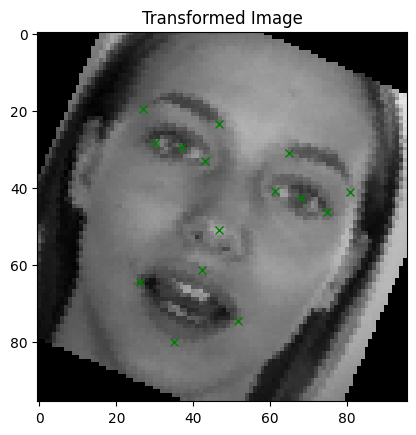

In [206]:
pick = data[30]
transformed_image, keypoints = pick['image'], pick['keypoints']
keypoints = keypoints.numpy()
keypoints = keypoints.reshape([15,2])

transformed_image_np = transformed_image.numpy()
transformed_image_np = np.transpose(transformed_image_np, (1, 2, 0))

for coord in keypoints:
  plt.plot(coord[0], coord[1], 'gx')

plt.imshow(transformed_image_np)
plt.title('Transformed Image')

plt.show()

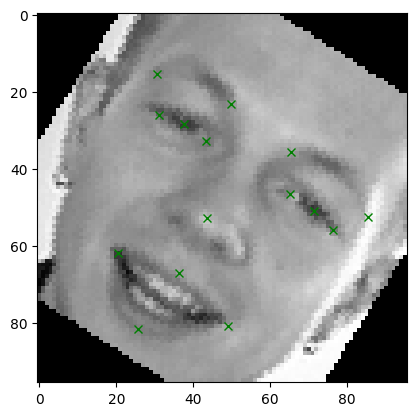

In [210]:
plot_image_with_kp(40, data)

# Model - with transfer learning

In [211]:
device = torch.device("cuda" if torch.cuda.is_available() else "cpu")
print("using: ", device)

using:  cuda


Hyper-Params

In [212]:
BATCH_SIZE = 64
EPOCHS = 120
EPOCHS_PRETRAIN = 25

Load Pre-Trained ResNet18

In [238]:
from torchvision import models

model = models.resnet18(pretrained = True)

# modify the last layer
model.fc = torch.nn.Linear(model.fc.in_features, 30)

num_features = model.fc.in_features
print("number of feature : ", num_features) # number of input features the soon to be added layer


number of feature :  512


/usr/local/lib/python3.10/dist-packages/torchvision/models/_utils.py:208: UserWarning: The parameter 'pretrained' is deprecated since 0.13 and may be removed in the future, please use 'weights' instead.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/torchvision/models/_utils.py:223: UserWarning: Arguments other than a weight enum or `None` for 'weights' are deprecated since 0.13 and may be removed in the future. The current behavior is equivalent to passing `weights=ResNet18_Weights.IMAGENET1K_V1`. You can also use `weights=ResNet18_Weights.DEFAULT` to get the most up-to-date weights.
  warnings.warn(msg)


In [239]:
model = model.type(torch.FloatTensor)
model = model.to(device)

specificly defin our train and test samples
- aiming for 80% training and 20% testing

In [240]:
TRAIN_SIZE = int(len(data) * 0.8)
TEST_SIZE = len(data) - TRAIN_SIZE
print("train size: ", TRAIN_SIZE, "test size: ", TEST_SIZE)

train size:  5195 test size:  1299


In [241]:
train_transform = torchvision.transforms.Compose([
    MyToTensor(),
    MyRandomRotation()
])

test_transform = torchvision.transforms.Compose([
    MyToTensor()
])

In [276]:
train_data, test_data = torch.utils.data.random_split(data, [TRAIN_SIZE, TEST_SIZE])

# define the transform compositions
train_data.dataset.transform = train_transform
test_data.dataset.transform = test_transform

train_loader = torch.utils.data.DataLoader(train_data, batch_size=BATCH_SIZE, shuffle = True)
test_loader = torch.utils.data.DataLoader(test_data, batch_size=BATCH_SIZE, shuffle = False)

In [243]:
*previous_layers, last_layer = model.parameters()

# set all the previous layers to require_grad false, so there is no backpropagation, no more optimization is required
# for the already trained weights

# but we need to train our new layer
for layer in previous_layers:
  layer.requires_grad = False

## Optimizer

In [244]:
optimizer = torch.optim.Adam(model.parameters(), lr=0.1, weight_decay=0.001)


## Pre-Training

In [247]:
logger = {'train':[], 'test': []}

train_steps = TRAIN_SIZE / BATCH_SIZE
test_steps = TEST_SIZE/ BATCH_SIZE

for epoch in range(EPOCHS_PRETRAIN):
  torch.manual_seed(1+epoch)
  # model.train() informs the model about the tranining state and let layers such as Norm2D to behavce different
  # as they should between training loop and testing loop
  model.train()

  train_loss = 0.0

  # we use the our define MSELOSS that is optimized to return 0 when data point is Nan

  for (batch_idx, sample) in enumerate(train_loader):
    image = sample['image']
    keys = sample['keypoints']

    (image, keys) = (image.to(device), keys.to(device))
    pred = model(image)
    # print(pred.shape)
    # print(keys.shape)
    # print(64*30)
    loss = NaNMSELoss(pred, keys)

    optimizer.zero_grad()
    loss.backward()
    optimizer.step()

    train_loss += loss


    with torch.no_grad():
      model.eval()
      val_loss = 0.0
      for val_sample in test_loader:
          image = val_sample['image']
          keys = val_sample['keypoints']
          (image, keys) = (image.to(device), keys.to(device))
          pred = model(image)
          val_loss += NaNMSELoss(pred, keys)

    avg_train_loss = train_loss / test_steps
    avg_val_loss = val_loss / test_steps

    logger["train"].append(avg_train_loss.cpu().detach().numpy())
    logger["test"].append(avg_val_loss.cpu().detach().numpy())
    print(f"Average train loss: {avg_train_loss:.6f}, Average validation loss: {avg_val_loss:.6f}")


Average train loss: 131.796112, Average validation loss: 2727.735596
Average train loss: 262.025116, Average validation loss: 2717.864990
Average train loss: 390.793579, Average validation loss: 2708.020020
Average train loss: 520.568115, Average validation loss: 2698.195801
Average train loss: 648.799744, Average validation loss: 2688.395508
Average train loss: 776.101318, Average validation loss: 2678.620605
Average train loss: 903.808838, Average validation loss: 2668.869141
Average train loss: 1031.443115, Average validation loss: 2659.140625
Average train loss: 1158.563477, Average validation loss: 2649.435547
Average train loss: 1283.480103, Average validation loss: 2639.758301
Average train loss: 1409.209839, Average validation loss: 2630.105713
Average train loss: 1535.526123, Average validation loss: 2620.476318
Average train loss: 1659.423340, Average validation loss: 2610.874512
Average train loss: 1784.193115, Average validation loss: 2601.297607
Average train loss: 1908.55

In [248]:
for layer in previous_layers:
  layer.requires_grad = True

# The Real Traning

In [249]:
optimizer = torch.optim.Adam(model.parameters(), lr=0.0005, weight_decay=0.00005)
scheduler = torch.optim.lr_scheduler.MultiStepLR(optimizer, milestones=[5, 10, 25, 40, 65], gamma=0.1)

In [250]:
logger = {'train': [], 'val': []}


best_model = None
min_val_loss = np.inf

train_steps = TRAIN_SIZE / BATCH_SIZE
test_steps = TEST_SIZE / BATCH_SIZE

for epoch in range(EPOCHS):
    torch.manual_seed(1 + epoch)

    print(f"EPOCH: {epoch + 1}/{EPOCHS}")

    model.train()
    train_loss = 0.0
    for (batch_idx, sample) in enumerate(train_loader):
        image = sample['image']
        keys = sample['keypoints']
        (image, keys) = (image.to(device), keys.to(device))
        pred = model(image)
        loss = NaNMSELoss(pred, keys)

        optimizer.zero_grad()
        loss.backward()
        optimizer.step()

        train_loss += loss

    with torch.no_grad():
        model.eval()
        val_loss = 0.0
        for val_sample in test_loader:
            image = val_sample['image']
            keys = val_sample['keypoints']
            (image, keys) = (image.to(device), keys.to(device))
            pred = model(image)
            val_loss += NaNMSELoss(pred, keys)

    scheduler.step()

    avg_train_loss = train_loss / test_steps
    avg_val_loss = val_loss / test_steps

    logger["train"].append(avg_train_loss.cpu().detach().numpy())
    logger["val"].append(avg_val_loss.cpu().detach().numpy())
    print(f"Average train loss: {avg_train_loss:.6f}, Average validation loss: {avg_val_loss:.6f}")

    if min_val_loss > val_loss:
        min_test_loss = val_loss
        best_model = copy.deepcopy(model)


logger_df = pd.DataFrame(logger)
logger_df.to_csv('logger.csv')

EPOCH: 1/120
Average train loss: 20.845398, Average validation loss: 4.766451
EPOCH: 2/120
Average train loss: 12.233316, Average validation loss: 6.803650
EPOCH: 3/120
Average train loss: 9.521842, Average validation loss: 3.502424
EPOCH: 4/120
Average train loss: 9.105842, Average validation loss: 3.468090
EPOCH: 5/120
Average train loss: 7.331072, Average validation loss: 7.024704
EPOCH: 6/120
Average train loss: 5.281584, Average validation loss: 2.433682
EPOCH: 7/120
Average train loss: 4.371015, Average validation loss: 2.352166
EPOCH: 8/120
Average train loss: 4.073271, Average validation loss: 2.329649
EPOCH: 9/120
Average train loss: 3.854311, Average validation loss: 2.321387
EPOCH: 10/120
Average train loss: 3.729722, Average validation loss: 2.295537
EPOCH: 11/120
Average train loss: 3.498157, Average validation loss: 2.300317
EPOCH: 12/120
Average train loss: 3.488666, Average validation loss: 2.301563
EPOCH: 13/120
Average train loss: 3.491457, Average validation loss: 2.

In [ ]:
best_model.to(device)

In [252]:
logger_df.head()

,train,val
0,20.845398,4.7664514
1,12.233316,6.8036504
2,9.521842,3.5024245
3,9.105842,3.4680898
4,7.3310723,7.0247035


Save Model

In [264]:
torch.save(model, '/content/saved_model/model.pth')

# Visualization of Loss

2.2802815


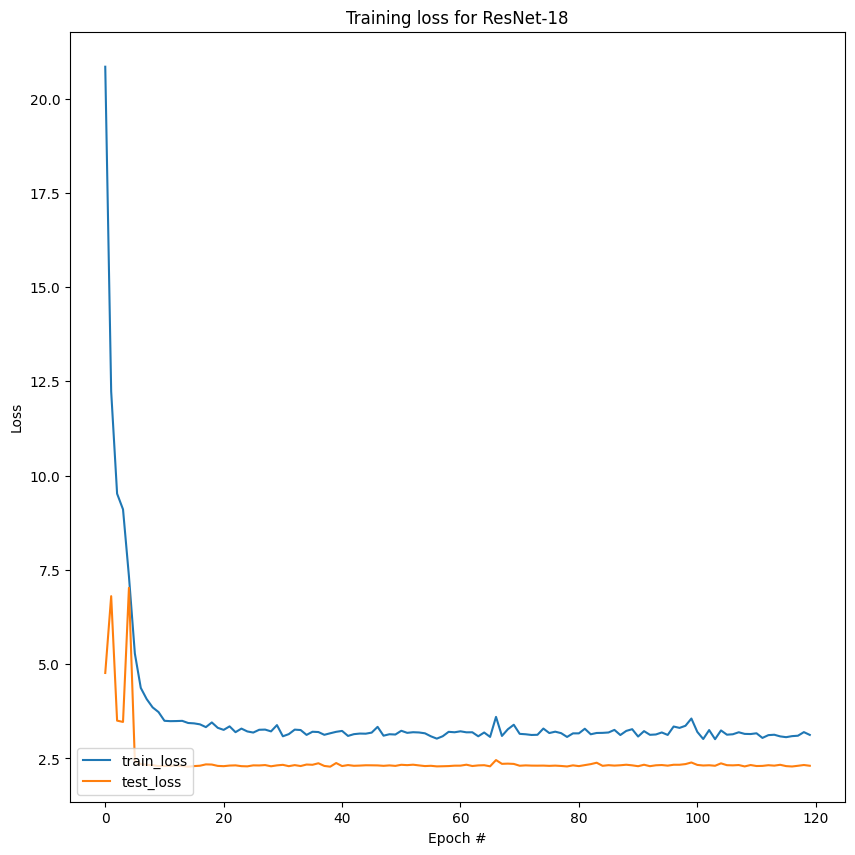

In [266]:
plt.figure(figsize = (10, 10))
plt.plot(logger_df['train'], label = "train_loss")
plt.plot(logger_df['val'], label = 'test_loss')

plt.title("Training loss for ResNet-18")
plt.xlabel("Epoch #")
plt.ylabel("Loss")
plt.legend(loc="lower left")
print(min(logger_df["val"]))

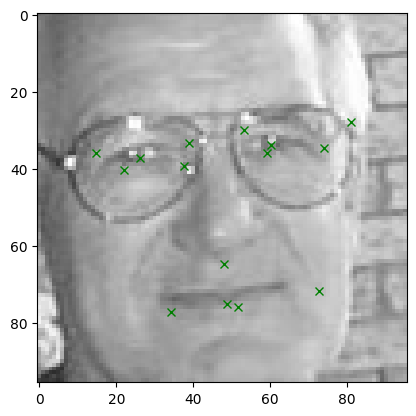

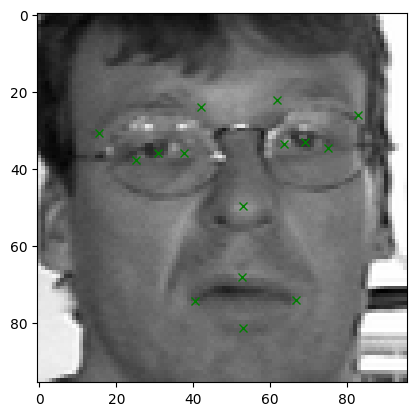

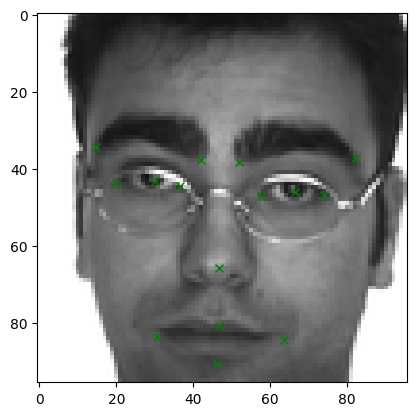

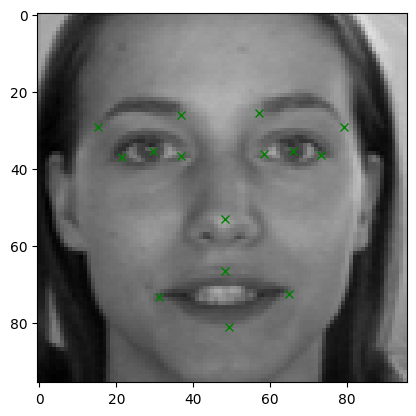

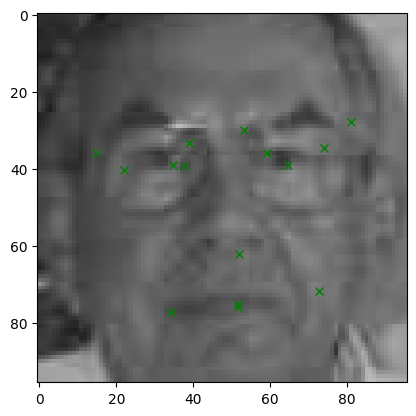

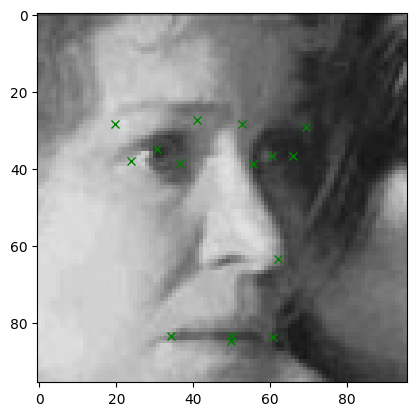

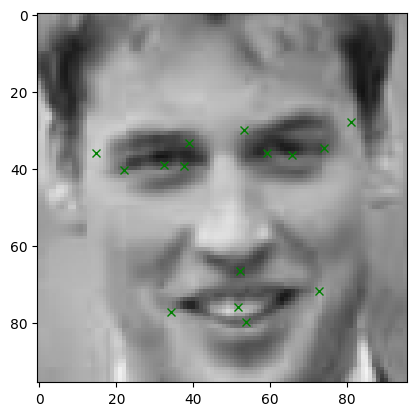

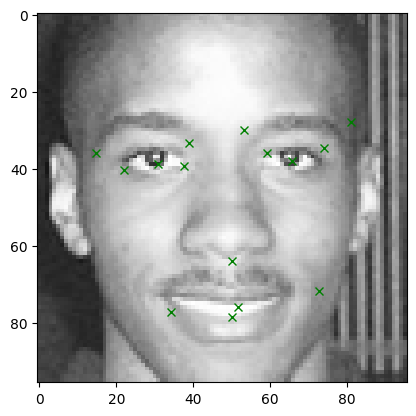

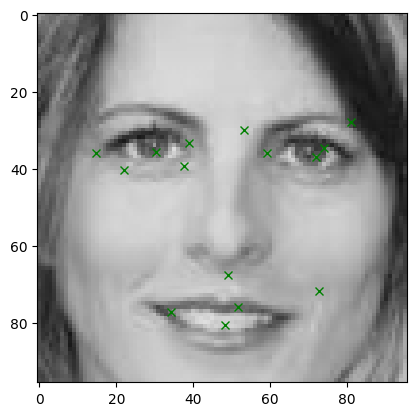

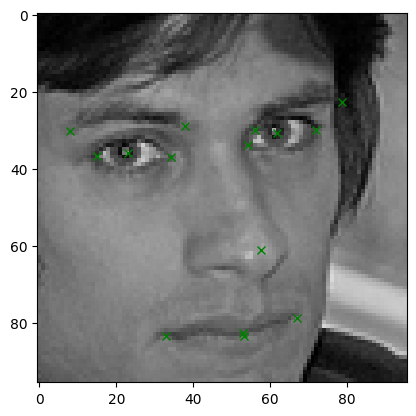

In [331]:
# choose random indices
test_images_index = np.random.randint(0, len(test_data) - 1, 10)

test_sample = [test_data[idx] for idx in test_images_index]
i = 0
for item in test_sample:
  plot_image_with_kp(test_images_index[i], test_data)
  plt.show()
  i += 1

<ipython-input-332-3993f6d0798f>:17: UserWarning: color is redundantly defined by the 'color' keyword argument and the fmt string "gx" (-> color='g'). The keyword argument will take precedence.
  plt.plot(coord[0], coord[1], 'gx', color="red")


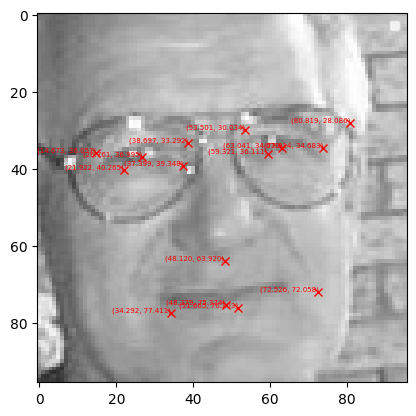

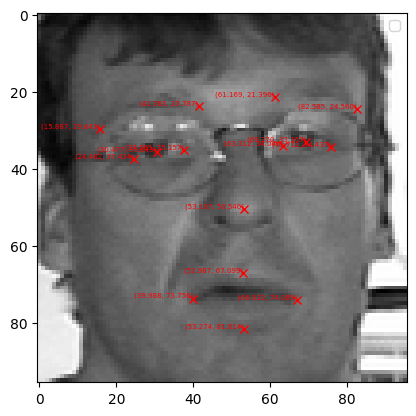

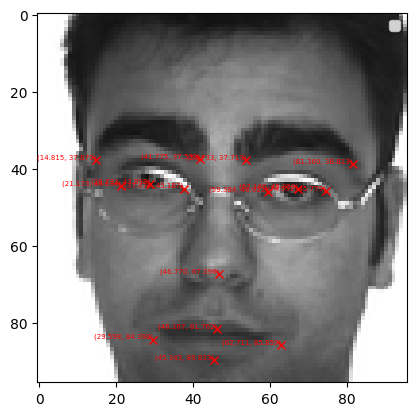

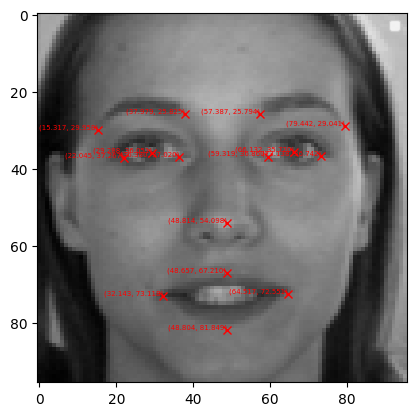

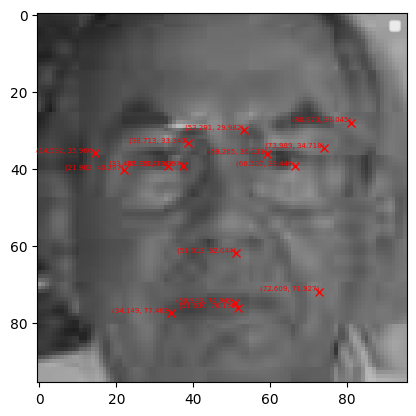

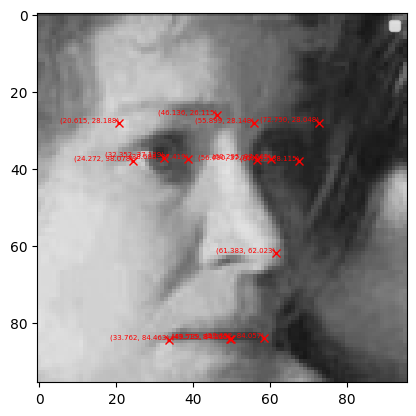

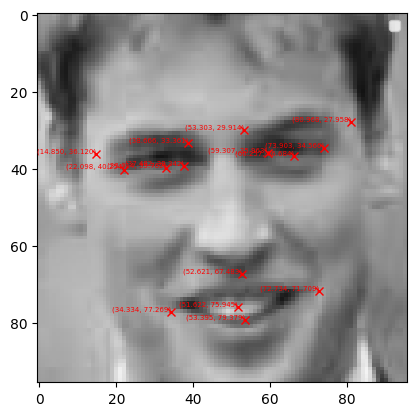

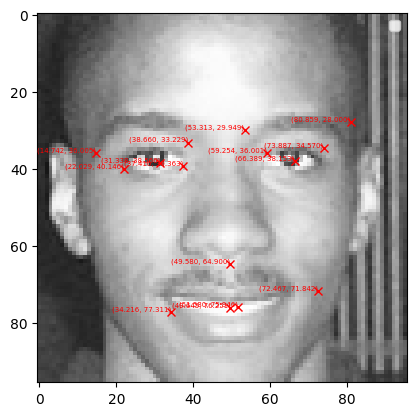

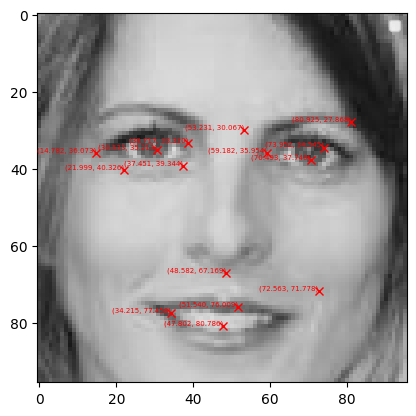

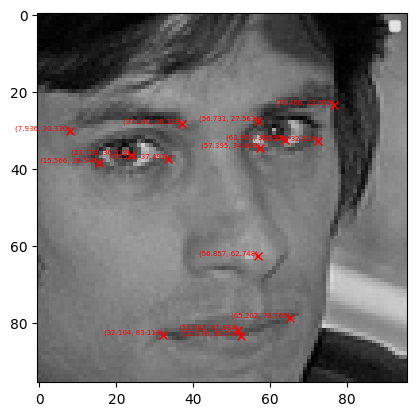

In [332]:
best_model = best_model.to(device)

best_model.eval() # setting to evaluation mode before testing out the output
for idx in test_images_index:
  sample = test_data[idx]
  image = sample['image']
  image = image.to(device)

  kps = sample['keypoints']
  with torch.no_grad():
      pred_keys = best_model(image.unsqueeze(0)).cpu().detach().numpy().reshape((30,))

  plt.imshow(image.cpu().detach().numpy().transpose((1, 2, 0)), cmap='gray')
  pred_keys = pred_keys.reshape([15,2])

  for coord in pred_keys:
      plt.plot(coord[0], coord[1], 'gx', color="red")
      plt.text(coord[0], coord[1], f'({coord[0]:.3f}, {coord[1]:.3f})', fontsize=5, color='red', verticalalignment='bottom', horizontalalignment='right')


  plt.legend()
  plt.show()


<ipython-input-407-290d6014dbca>:30: UserWarning: color is redundantly defined by the 'color' keyword argument and the fmt string "gx" (-> color='g'). The keyword argument will take precedence.
  plt.plot(coord_x, coord_y, 'gx', color="red")


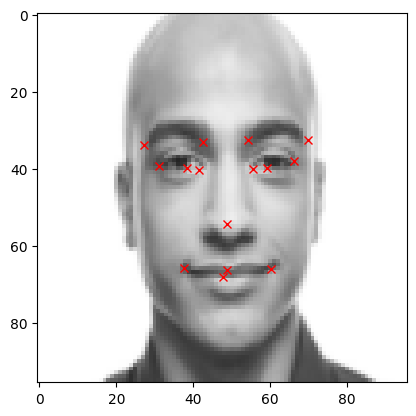

In [407]:
from PIL import Image

image_path = "test9.png"
input_image = Image.open(image_path).convert("L") # "L" means grey scale

input_image = input_image.convert("RGB")

resize = transforms.Resize((96, 96))
input_image = resize(input_image)

new_transform = transforms.Compose([
    transforms.ToTensor(),
])

# batch dimension
input_tensor = new_transform(input_image).unsqueeze(0)

input_tensor = input_tensor.to(device)

with torch.no_grad():
    predictions = best_model(input_tensor)


pred_keys = predictions.cpu().numpy().reshape((15, 2))

plt.imshow(input_image)
for i, (coord_x, coord_y) in enumerate(pred_keys):
    plt.plot(coord_x, coord_y, 'gx', color="red")

plt.show()